<a href="https://colab.research.google.com/github/quanqvinh/Manager-Store/blob/main/COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm





In [ ]:
#1 Đọc dữ liệu
data = pd.read_csv('/content/weight_change_dataset.csv')

In [ ]:
print(data.head())

   Participant ID  Age Gender  Current Weight (lbs)  BMR (Calories)  \
0               1   56      M                 228.4          3102.3   
1               2   46      F                 165.4          2275.5   
2               3   32      F                 142.8          2119.4   
3               4   25      F                 145.5          2181.3   
4               5   38      M                 155.5          2463.8   

   Daily Calories Consumed  Daily Caloric Surplus/Deficit  \
0                   3916.0                          813.7   
1                   3823.0                         1547.5   
2                   2785.4                          666.0   
3                   2587.3                          406.0   
4                   3312.8                          849.0   

   Weight Change (lbs)  Duration (weeks) Physical Activity Level  \
0                  0.2                 1               Sedentary   
1                  2.4                 6             Very Active   
2 

In [ ]:
#2 Làm sạch dữ liệu
print(data.isnull().sum())

Participant ID                   0
Age                              0
Gender                           0
Current Weight (lbs)             0
BMR (Calories)                   0
Daily Calories Consumed          0
Daily Caloric Surplus/Deficit    0
Weight Change (lbs)              0
Duration (weeks)                 0
Physical Activity Level          0
Sleep Quality                    0
Stress Level                     0
Final Weight (lbs)               0
dtype: int64


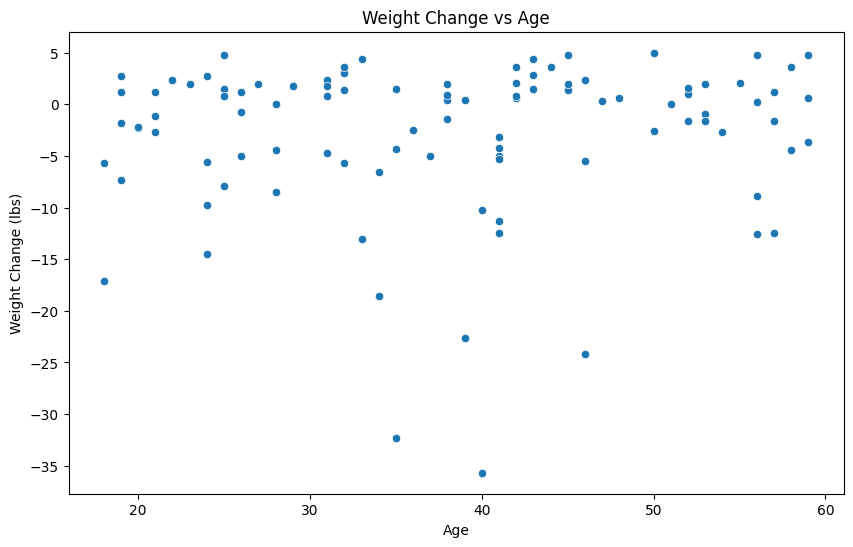

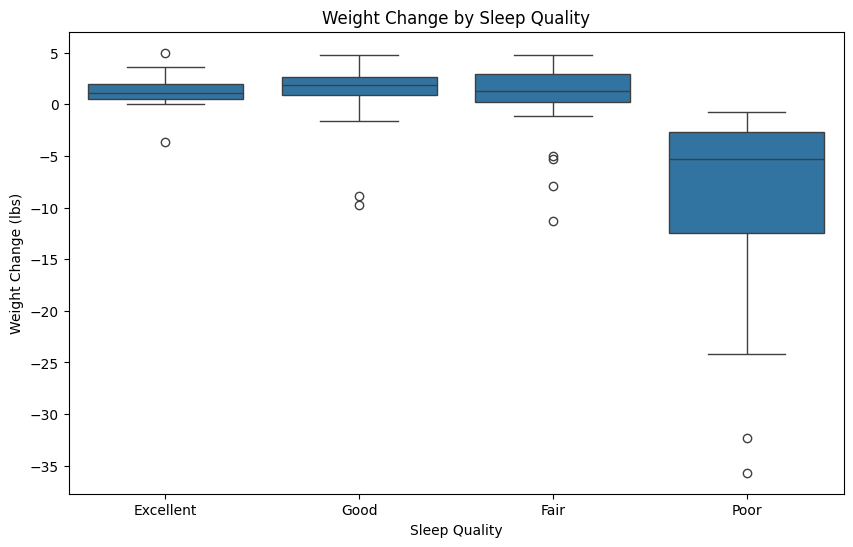

In [ ]:
#3 Làm rõ dữ liệu
# Phân bố cân nặng thay đổi theo độ tuổi
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Weight Change (lbs)', data=data)
plt.title('Weight Change vs Age')
plt.show()

# Phân bố cân nặng thay đổi theo chất lượng giấc ngủ
plt.figure(figsize=(10,6))
sns.boxplot(x='Sleep Quality', y='Weight Change (lbs)', data=data)
plt.title('Weight Change by Sleep Quality')
plt.show()



In [ ]:
#4 T-test
group1 = data[data['Sleep Quality'] == 'Good']['Weight Change (lbs)']
group2 = data[data['Sleep Quality'] == 'Poor']['Weight Change (lbs)']

# Kiểm định t-test
t_stat, p_val = stats.ttest_ind(group1, group2)
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: 4.969489741612367
P-value: 6.273926825928779e-06


In [ ]:
print(data.columns)


Index(['Participant ID', 'Age', 'Gender', 'Current Weight (lbs)',
       'BMR (Calories)', 'Daily Calories Consumed',
       'Daily Caloric Surplus/Deficit', 'Weight Change (lbs)',
       'Duration (weeks)', 'Physical Activity Level', 'Sleep Quality',
       'Stress Level', 'Final Weight (lbs)'],
      dtype='object')


In [ ]:
data = pd.get_dummies(data, columns=['Sleep Quality'], drop_first=True)

In [ ]:
print(data.columns)

Index(['Participant ID', 'Age', 'Gender', 'Current Weight (lbs)',
       'BMR (Calories)', 'Daily Calories Consumed',
       'Daily Caloric Surplus/Deficit', 'Weight Change (lbs)',
       'Duration (weeks)', 'Physical Activity Level', 'Stress Level',
       'Final Weight (lbs)', 'Sleep Quality_Fair', 'Sleep Quality_Good',
       'Sleep Quality_Poor'],
      dtype='object')


In [ ]:
print(data.dtypes)

Participant ID                     int64
Age                                int64
Gender                            object
Current Weight (lbs)             float64
BMR (Calories)                   float64
Daily Calories Consumed          float64
Daily Caloric Surplus/Deficit    float64
Weight Change (lbs)              float64
Duration (weeks)                   int64
Physical Activity Level           object
Stress Level                       int64
Final Weight (lbs)               float64
Sleep Quality_Fair                  bool
Sleep Quality_Good                  bool
Sleep Quality_Poor                  bool
dtype: object


In [ ]:
# Chuyển đổi các cột 'bool' sang kiểu 'int' để đảm bảo tính nhất quán
data['Sleep Quality_Fair'] = data['Sleep Quality_Fair'].astype(int)
data['Sleep Quality_Good'] = data['Sleep Quality_Good'].astype(int)
data['Sleep Quality_Poor'] = data['Sleep Quality_Poor'].astype(int)

In [ ]:
# Đặt biến phụ thuộc và biến độc lập
y = data['Weight Change (lbs)']
X = data[['Age', 'Sleep Quality_Fair', 'Sleep Quality_Good', 'Sleep Quality_Poor']]
# Thêm hằng số cho mô hình hồi quy (intercept)
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Hiển thị kết quả hồi quy
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Weight Change (lbs)   R-squared:                       0.382
Model:                             OLS   Adj. R-squared:                  0.356
Method:                  Least Squares   F-statistic:                     14.70
Date:                 Thu, 31 Oct 2024   Prob (F-statistic):           2.21e-09
Time:                         13:58:09   Log-Likelihood:                -318.04
No. Observations:                  100   AIC:                             646.1
Df Residuals:                       95   BIC:                             659.1
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0